# 作業目標:

反向傳播演算法 - 通過建立多層的神經網路, 了解中間層權重值的更新

# 作業重點:

建立一個3 層神經網路, 通過中間層參數的變數，以對更多關係的組合進行分組

syn1 權值矩陣將隱層的組合輸出映射到最終結果，而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，


In [1]:
import numpy as np
 
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x));
dy/dx = df = x*(1-x) 

利用 deriv (derivative)做變數, 來分別指定方程式

'''    
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
 
    return 1/(1+np.exp(-x))

# 參數定義
# X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
# y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
 
y = np.array([[0],
            [1],
            [1],
            [0]])
 
np.random.seed(1)

# randomly initialize our weights with mean 0 
# syn0 第一層權值
# syn1 第二層權值

syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]

print(X.shape, y.shape, syn0.shape, syn1.shape)

for j in range(60000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # 如何計算損失: 
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的損失。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的損失，除了確信損失很小時，它近似等於 l1_error 。
        
    '''
    作業: 
    新增
    l2_error 該值說明了神經網路預測時“損失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的損失，除了確信損失很小時，它近似等於預測輸出。
    '''
    '''
    損失計算: 數學函數輸出值減掉網路層的輸出值
    l2_error = ??
    '''
    l2_error = y - syn1
        
    
    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    '''
    可以參照 l1
    l2_delta = 損失跟輸出函數的乘積
    '''
    l2_delta = l2_error * nonlin(l2, True)
    
    
    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

(4, 3) (4, 1) (3, 4) (4, 1)
L2_Error:0.7802551154290065
L1_Error:0.7802551154290065
L2_Error:7.281331849929786
L1_Error:7.281331849929786
L2_Error:7.652180050372353
L1_Error:7.652180050372353
L2_Error:7.8663434417747995
L1_Error:7.8663434417747995
L2_Error:8.017165735115576
L1_Error:8.017165735115576
L2_Error:8.133547581669664
L1_Error:8.133547581669664


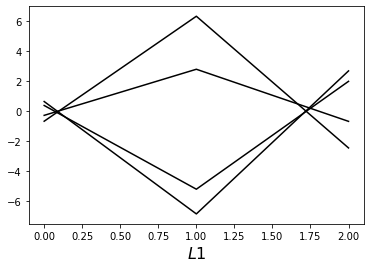

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(syn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

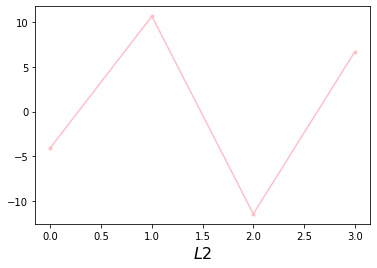

In [3]:
plt.plot(syn1_history[0], 'o-', ms=3, lw=1.5, color='pink')
plt.xlabel(r'$L2$', fontsize=16)
plt.show()

In [4]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[0.33915085 0.93699702 0.08005018 0.88116667]
 [0.89497473 0.01560371 0.98026067 0.03948996]
 [0.28208567 0.96629526 0.04308429 0.91652197]
 [0.86709751 0.02965022 0.96254044 0.05738146]]


In [5]:
print("Output After Training (根據 L2):")
print(l2)

Output After Training (根據 L2):
[[9.99998800e-01]
 [5.38082398e-07]
 [9.99999640e-01]
 [9.67045495e-07]]
